In [3]:
import os
import traceback
import pickle
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from LearningSession import *
from LearningChoicePredictor import *

In [4]:
animal = 'mSM63'
folder = '/home/chingf/engram/data/musall/learning/neural/mSM63'
dates = os.listdir(folder)
dates.sort()
dates = dates[1:]
dates.sort(key = lambda date: datetime.strptime(date, '%d-%b-%Y')) 

In [ ]:
r = {}
r['results'] = []
r['dates'] = []
pickles = os.listdir("pickles/")
pickles = [p for p in pickles if p.startswith("choicedecoding_learning")]
for p in pickles:
    f = open("pickles/" + p, "rb")
    p_r = pickle.load(f)
    r['results'].extend(p_r['all_results'])
    r['dates'].extend(p_r['dates'])

In [ ]:
import matplotlib.pylab as pl
plt.figure()
dates_of_interest = dates[:]
colors = pl.cm.Greys(np.linspace(-0.1,1.1,len(dates_of_interest)))
for idx, date in enumerate(dates_of_interest):
    date_idx = np.argwhere(np.array(r['dates']) == date)[0,0]
    plt.plot(r['results'][date_idx]['scores'], color=colors[idx])
plt.ylim((0.5,1.0))
plt.title("Learning Data Neural Activity", fontsize=14)
plt.ylabel("Choice Decoding", fontsize=13)
plt.xticks(
    [0,4,8,12],
    ['Lever In', 'Stim On', 'Stim Off', 'Spout In'],
    fontsize=13
    )


/home/chingf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Learning Data Mouse mSM63')

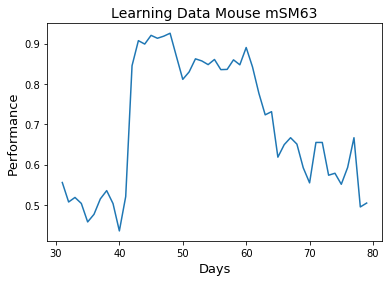

In [14]:
accuracy = []
p_aud = []
for date in dates:
    session = LearningSession(animal, date, access_engram=True)
    is_aud_trial = np.array(session.is_aud_trial)
    indices = np.argwhere(np.logical_not(is_aud_trial))
    p_aud.append(np.sum(session.is_aud_trial)/len(session.is_aud_trial))
    expected = np.array(session.trialmarkers['CorrectSide'][indices])
    actual = np.array(session.trialmarkers['ResponseSide'][indices])
    accuracy.append(np.sum(expected == actual)/(1.0*expected.size))
plt.plot(accuracy)
plt.ylabel("Performance", fontsize=13)
plt.xlabel("Days", fontsize=13)
plt.title("Learning Data Mouse mSM63", fontsize=14)

Text(0.5, 1.0, 'Learning Data Mouse mSM63')

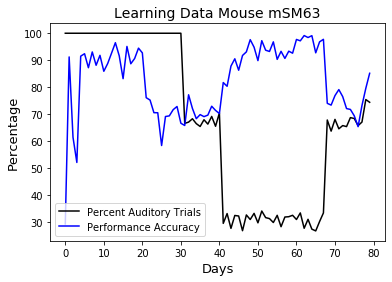

In [12]:
p_aud = np.array(p_aud)
accuracy = np.array(accuracy)
plt.plot(p_aud*100, color="black", label="Percent Auditory Trials")
plt.plot(accuracy*100, color="blue", label="Performance Accuracy")
plt.ylabel("Percentage", fontsize=13)
plt.xlabel("Days", fontsize=13)
plt.legend()
plt.title("Learning Data Mouse mSM63", fontsize=14)